# ByT5 Model

In [1]:
# imports
from transformers import TrainingArguments, ByT5Tokenizer
from sklearn.metrics import roc_curve, auc
from utils import ByT5_model, ByT5_utils
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import os

In [2]:
load_dotenv()

# CONSTANTS
SAVE = True
VERSION = "v6"
RESULTS_PATH = os.getenv("RESULTS_PATH")
MODEL_PATH = os.getenv("MODEL_PATH")
MAX_LENGTH = 100

In [3]:
# load data
# need to put in our data here. the data format expects the following format:
# url, label
# url is the whole url
# label is 0 for non-phishing, and 1 for phishing

train_data = pd.read_csv("datasets/train.csv")
val_data = pd.read_csv("datasets/validation.csv")
bench_data = pd.read_csv("datasets/benchmark.csv")

print(f"{len(train_data)} training samples")
print(f"{len(val_data)} validation samples")
print(f"{len(bench_data)} benchmark samples")

21050 training samples
2631 validation samples
2633 benchmark samples


In [4]:
# training data
train_count = train_data["label"].value_counts()
phish_count = train_count[1]
benign_count = train_count[0]
print(f"Training data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

val_count = val_data["label"].value_counts()
phish_count = val_count[1]
benign_count = val_count[0]
print(f"Validation data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

# benchmark data
bench_count = bench_data["label"].value_counts()
phish_count = bench_count[1]
benign_count = bench_count[0]
print(f"Benchmark data value count:\nphishing: {phish_count}\nbenign: {benign_count}")

Training data value count:
phishing: 6849
benign: 14201
Validation data value count:
phishing: 856
benign: 1775
Benchmark data value count:
phishing: 857
benign: 1776


In [5]:
# intialise model, tokenizer
model = ByT5_model.ByT5ForClassification(
    model_name='google/byt5-small',
    num_labels=2,
    freeze=True,
    encoder_unfrozen_layers=0,
    decoder_unfrozen_layers=2,
)
tokenizer = ByT5Tokenizer.from_pretrained('google/byt5-small')

In [6]:
# hyperparameters
BATCH_SIZE = 32
training_args = TrainingArguments(
    # saving results/checkpoints
    output_dir=RESULTS_PATH,
    save_safetensors=False,

    # evaluation
    eval_strategy="epoch",
    eval_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
    
    # saving
    save_strategy="epoch",
    save_steps=1,
    save_total_limit=3,

    # hyperparameters
    learning_rate=0.005,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=100,
    weight_decay=0.01,
)

In [7]:
# training loop
trainer = ByT5_utils.train_ByT5(
    model=model,
    tokenizer=tokenizer,
    train_data=train_data,
    val_data=val_data,
    training_args=training_args,
    patience=3,
    max_length=MAX_LENGTH,
    )

Preparing data...


Map:   0%|          | 0/21050 [00:00<?, ? examples/s]

Map:   0%|          | 0/2631 [00:00<?, ? examples/s]

Data prepared.


  0%|          | 0/65800 [00:00<?, ?it/s]

Starting training
{'loss': 0.3423, 'grad_norm': 2.0162789821624756, 'learning_rate': 0.0049620060790273555, 'epoch': 0.76}


  0%|          | 0/83 [00:00<?, ?it/s]

{'eval_loss': 0.16486157476902008, 'eval_runtime': 9.606, 'eval_samples_per_second': 273.89, 'eval_steps_per_second': 8.64, 'epoch': 1.0}
{'loss': 0.2499, 'grad_norm': 1.0981709957122803, 'learning_rate': 0.004924012158054712, 'epoch': 1.52}


  0%|          | 0/83 [00:00<?, ?it/s]

{'eval_loss': 0.131023570895195, 'eval_runtime': 9.2947, 'eval_samples_per_second': 283.064, 'eval_steps_per_second': 8.93, 'epoch': 2.0}
{'loss': 0.2128, 'grad_norm': 0.9620159268379211, 'learning_rate': 0.004886018237082067, 'epoch': 2.28}


  0%|          | 0/83 [00:00<?, ?it/s]

{'eval_loss': 0.1256650984287262, 'eval_runtime': 9.6462, 'eval_samples_per_second': 272.749, 'eval_steps_per_second': 8.604, 'epoch': 3.0}
{'loss': 0.191, 'grad_norm': 0.4746047258377075, 'learning_rate': 0.004848024316109423, 'epoch': 3.04}
{'loss': 0.2025, 'grad_norm': 2.395197868347168, 'learning_rate': 0.004810030395136778, 'epoch': 3.8}


  0%|          | 0/83 [00:00<?, ?it/s]

{'eval_loss': 0.12040996551513672, 'eval_runtime': 9.6548, 'eval_samples_per_second': 272.506, 'eval_steps_per_second': 8.597, 'epoch': 4.0}
{'loss': 0.2101, 'grad_norm': 2.942786455154419, 'learning_rate': 0.004772036474164134, 'epoch': 4.56}


  0%|          | 0/83 [00:00<?, ?it/s]

{'eval_loss': 0.13604986667633057, 'eval_runtime': 9.6702, 'eval_samples_per_second': 272.074, 'eval_steps_per_second': 8.583, 'epoch': 5.0}
{'loss': 0.2027, 'grad_norm': 1.2873793840408325, 'learning_rate': 0.004734042553191489, 'epoch': 5.32}


  0%|          | 0/83 [00:00<?, ?it/s]

{'eval_loss': 0.12462000548839569, 'eval_runtime': 9.7411, 'eval_samples_per_second': 270.092, 'eval_steps_per_second': 8.521, 'epoch': 6.0}
{'loss': 0.1936, 'grad_norm': 21.460126876831055, 'learning_rate': 0.004696048632218845, 'epoch': 6.08}
{'loss': 0.1937, 'grad_norm': 7.268858432769775, 'learning_rate': 0.004658054711246201, 'epoch': 6.84}


  0%|          | 0/83 [00:00<?, ?it/s]

{'eval_loss': 0.17077435553073883, 'eval_runtime': 9.6255, 'eval_samples_per_second': 273.336, 'eval_steps_per_second': 8.623, 'epoch': 7.0}
{'train_runtime': 1423.722, 'train_samples_per_second': 1478.519, 'train_steps_per_second': 46.217, 'train_loss': 0.22134789331446925, 'epoch': 7.0}
Training ended


In [8]:
# evaluate trained model
ByT5_utils.evaluate_ByT5(trainer)

  0%|          | 0/83 [00:00<?, ?it/s]

{'eval_loss': 0.12040996551513672,
 'eval_runtime': 9.8282,
 'eval_samples_per_second': 267.698,
 'eval_steps_per_second': 8.445,
 'epoch': 7.0}

In [9]:
# saving model
if SAVE:
    torch.save(
        model.state_dict(),
        f"{MODEL_PATH}/byt5-model-{VERSION}.pth"
    )
    tokenizer.save_pretrained(f"{MODEL_PATH}/byt5-tokenizer-{VERSION}")

In [10]:
# load model
if SAVE:
    model = ByT5_model.ByT5ForClassification()
    model.load_state_dict(torch.load(f"{MODEL_PATH}/byt5-model-{VERSION}.pth", weights_only=True))
    tokenizer = ByT5Tokenizer.from_pretrained(f"{MODEL_PATH}/byt5-tokenizer-{VERSION}")

In [11]:
# predict single url
ByT5_utils.predict_single_url(
    bench_data["url"][0],
    model,
    tokenizer,
    max_length=MAX_LENGTH
)

(0, 0.00047729845391586423)

In [12]:
# predict dataframe
y_true, predicted_classes, y_proba = ByT5_utils.predict_dataframe(
    bench_data,
    model,
    tokenizer,
    max_length=MAX_LENGTH
)

Processing 2633 samples
Processed 1000 samples
Processed 2000 samples
Done, processed 2633 samples


In [13]:
accuracies = ByT5_utils.calculate_accuracy_at_thresholds(y_true, y_proba)
for threshold, accuracy in accuracies:
    print(f"Threshold: {threshold:.2f}, Accuracy: {accuracy:.2f}")

Threshold: 0.10, Accuracy: 0.93
Threshold: 0.20, Accuracy: 0.94
Threshold: 0.30, Accuracy: 0.94
Threshold: 0.40, Accuracy: 0.94
Threshold: 0.50, Accuracy: 0.94
Threshold: 0.60, Accuracy: 0.95
Threshold: 0.70, Accuracy: 0.96
Threshold: 0.80, Accuracy: 0.96
Threshold: 0.90, Accuracy: 0.93


In [14]:
# statistics
ByT5_utils.fpr_comparison(np.array(y_true), np.array(y_proba))

,0.010,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001,0.000
precision,97.664835,97.896213,98.014184,98.290598,98.552822,98.814815,98.931298,99.217527,99.479167,99.595142,100.000000
fpr,0.009572,0.008446,0.007883,0.006757,0.005631,0.004505,0.003941,0.002815,0.001689,0.000563,0.000000
specificity,99.042793,99.155405,99.211712,99.324324,99.436937,99.549550,99.605856,99.718468,99.831081,99.943694,100.000000
accuracy,93.809343,93.391569,93.163692,93.201671,92.935815,92.480061,91.796430,91.340676,89.099886,76.756551,76.110900
recall,82.963827,81.446908,80.630105,80.513419,79.463244,77.829638,75.612602,73.978996,66.861144,28.704784,26.604434
f1_score,89.716088,88.917197,88.476312,88.518281,87.984496,87.075718,85.714286,84.759358,79.972087,44.565217,42.027650
threshold,0.887360,0.899317,0.906816,0.910806,0.915726,0.926413,0.944589,0.952952,0.971697,0.999609,0.999753


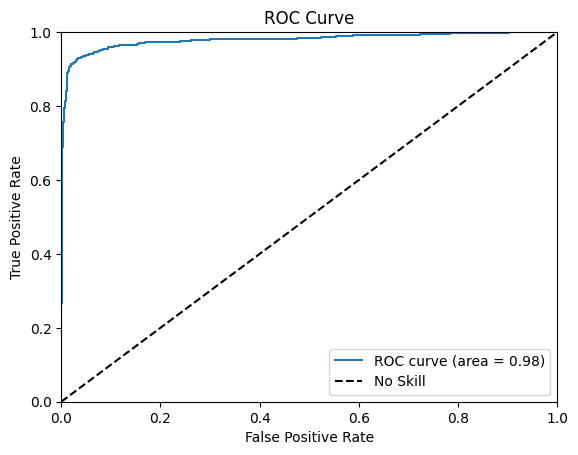

In [15]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()